<a href="https://colab.research.google.com/github/ItsMaynardk/Case-Study-in-Data-Science/blob/main/Office%20Tools%20Detection%20a%20Case%20Study%20in%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jul 13 16:49:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DtQuPGYsal6EqGa1Mjv3")
project = rf.workspace("john-maynardk").project("office-tools-n2dfg")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 176MB/s]
New https://pypi.org/project/ultralytics/8.2.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Office-Tools-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1720889421.52911c786e7b.1209.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Office-Tools-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 38. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.07it/s]
                   all         38         38       0.79      0.758      0.892      0.624
            Calculator         38          7      0.767          1      0.995      0.594
                  Glue         38         14       0.76      0.454      0.775      0.478
               Scissor         38         10 

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/19 /content/Office-Tools-1/test/images/99b04bb2-7d7b-4b5f-94b2-0167b26dcee1_jpg.rf.e113caa3e7b66a1b228790261600b178.jpg: 800x800 1 Scissor, 22.5ms
image 2/19 /content/Office-Tools-1/test/images/AnyConv-com__Calculator-17_jpg.rf.24692841087d4a3c42c9143861184c45.jpg: 800x800 1 Calculator, 22.5ms
image 3/19 /content/Office-Tools-1/test/images/AnyConv-com__Calculator-2_jpg.rf.e59eebe3094dec276e5f2c7ac9d2fdad.jpg: 800x800 1 Calculator, 22.4ms
image 4/19 /content/Office-Tools-1/test/images/AnyConv-com__Scissor-67_jpg.rf.4d07f5c3b45b80db63a093c505491aac.jpg: 800x800 1 Scissor, 22.4ms
image 5/19 /content/Office-Tools-1/test/images/AnyConv-com__Scissor-72_jpg.rf.446c70d50e3067500a6a4ce29b3b0c82.jpg: 800x800 1 Scissor, 22.4ms
image 6/19 /content/Office-Tools-1/test/images/AnyConv

In [ ]:
!pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


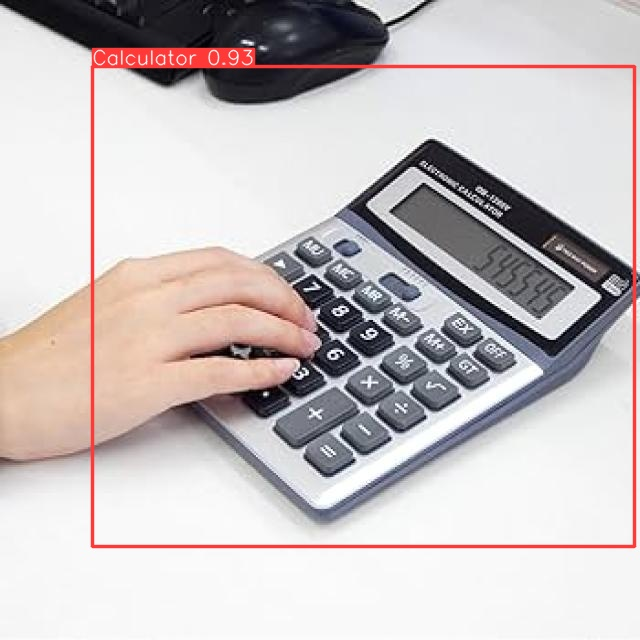

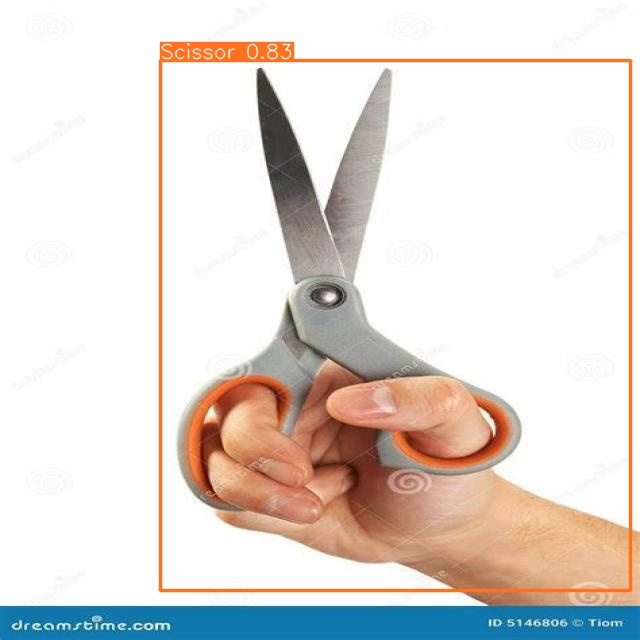

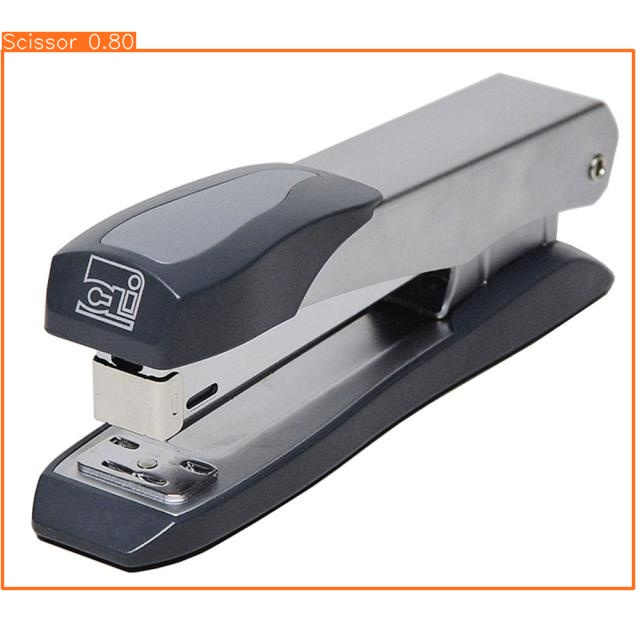

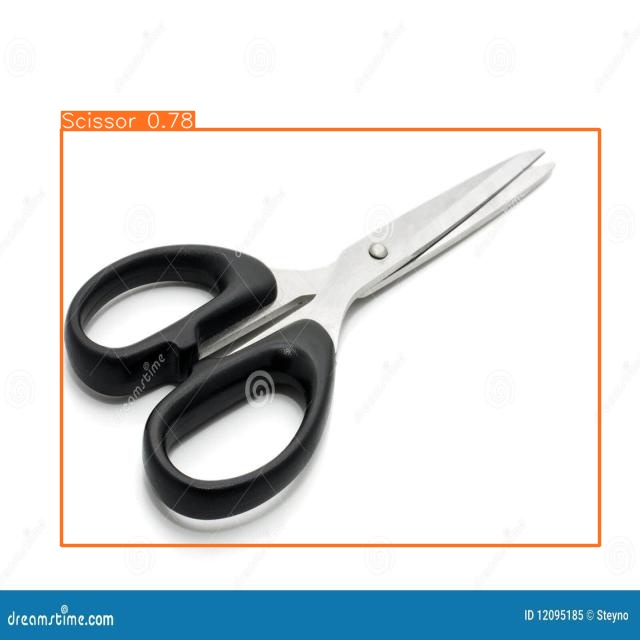

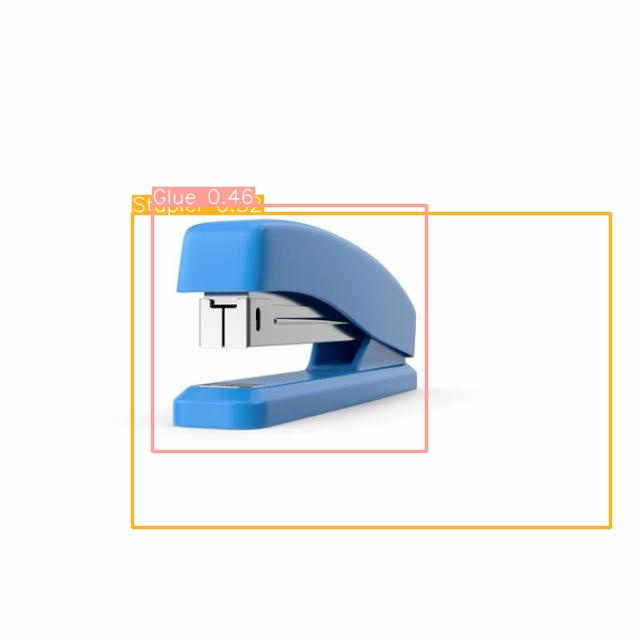

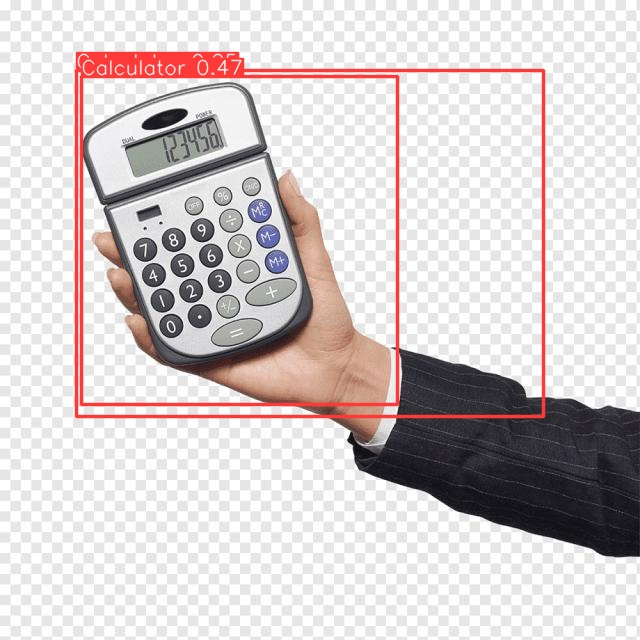

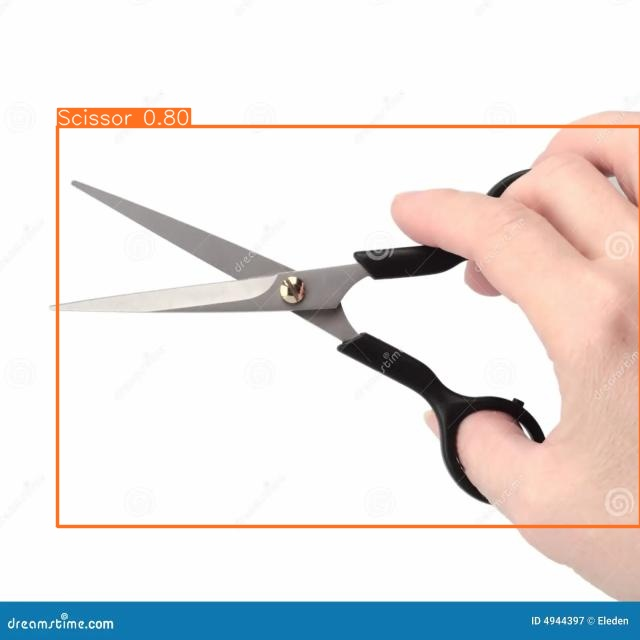

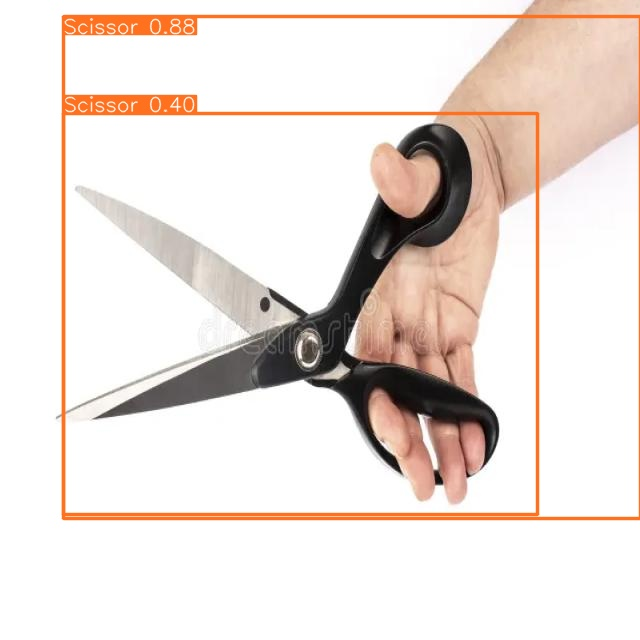

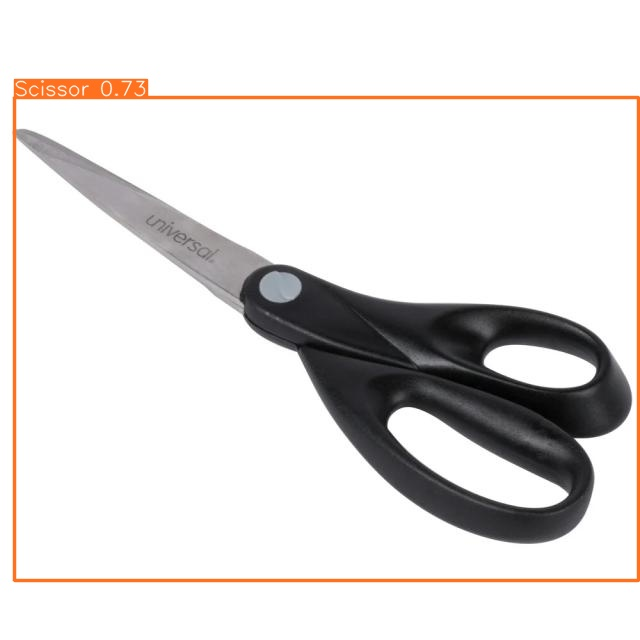

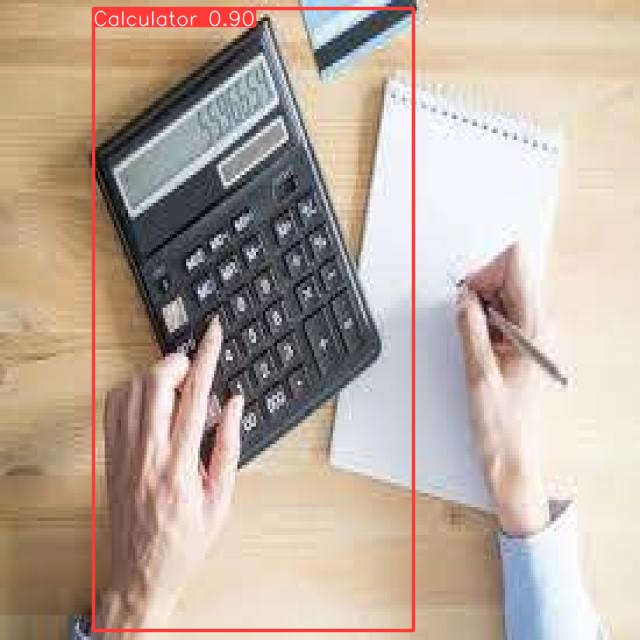

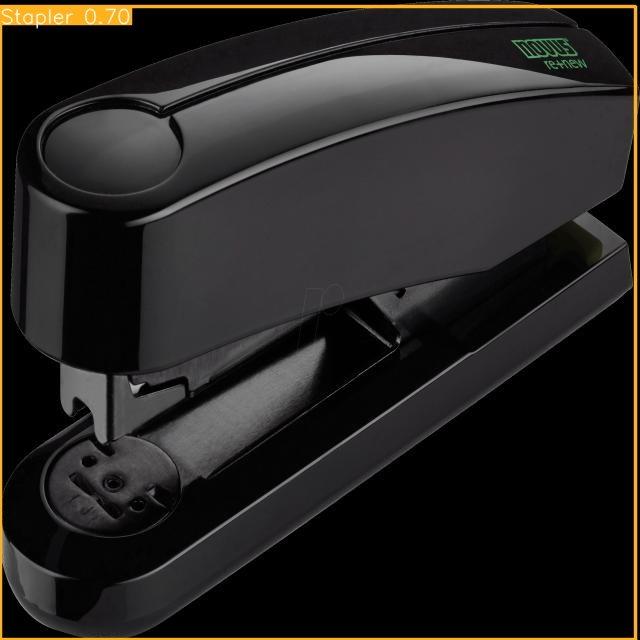

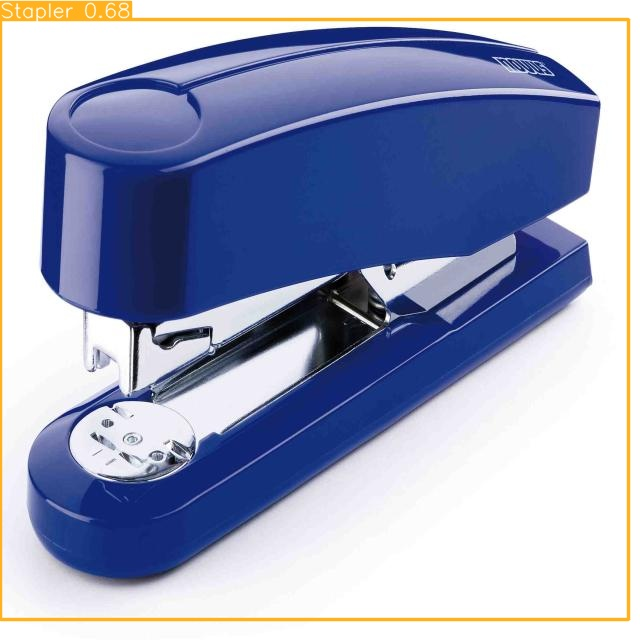

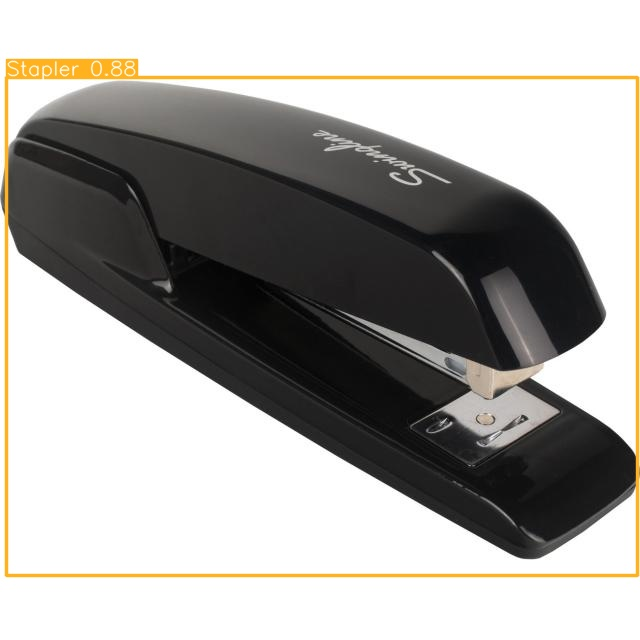

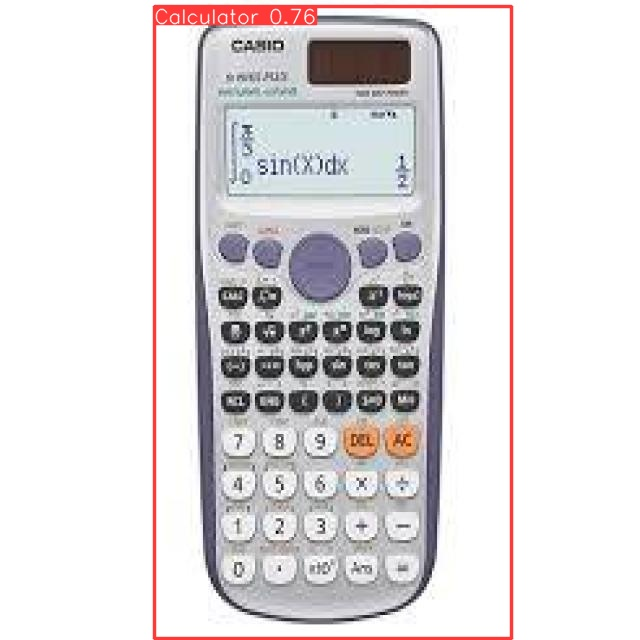

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[5:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/john-maynardk/office-tools-n2dfg/1
Share your model with the world at: https://universe.roboflow.com/john-maynardk/office-tools-n2dfg/model/1


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def plot_bounding_box_characteristics(training_data):
    epochs = training_data['epoch']
    precision = training_data['precision']
    recall = training_data['recall']
    mAP50 = training_data['mAP50']
    mAP50_95 = training_data['mAP50_95']

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, precision, label='Precision')
    plt.plot(epochs, recall, label='Recall')
    plt.plot(epochs, mAP50, label='mAP50')
    plt.plot(epochs, mAP50_95, label='mAP50-95')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Bounding Box Characteristics during the Training Phase')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_loss_components(training_data):
    epochs = training_data['epoch']
    box_loss = training_data['box_loss']
    obj_loss = training_data['obj_loss']
    cls_loss = training_data['cls_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, box_loss, label='Box Loss')
    plt.plot(epochs, obj_loss, label='Object Loss')
    plt.plot(epochs, cls_loss, label='Class Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Components of Loss Function during the Training of the Model')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_model_speed(training_data):
    epochs = training_data['epoch']
    fps = training_data['fps']

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, fps, label='FPS')
    plt.xlabel('Epochs')
    plt.ylabel('Frames per Second')
    plt.title('Speed of the Model in Frames per Second')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_classification_performance(training_data, validation_data):
    epochs_train = training_data['epoch']
    precision_train = training_data['precision']
    recall_train = training_data['recall']

    epochs_val = validation_data['epoch']
    precision_val = validation_data['precision']
    recall_val = validation_data['recall']

    plt.figure(figsize=(12, 6))
    plt.plot(epochs_train, precision_train, label='Training Precision')
    plt.plot(epochs_train, recall_train, label='Training Recall')
    plt.plot(epochs_val, precision_val, label='Validation Precision', linestyle='--')
    plt.plot(epochs_val, recall_val, label='Validation Recall', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Classification Performance during Training and Validation Phase')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def create_sample_data():
    data = {
        'epoch': list(range(1, 11)),
        'precision': [0.235, 0.320, 0.460, 0.510, 0.640, 0.750, 0.810, 0.870, 0.930, 0.895],
        'recall': [0.318, 0.400, 0.520, 0.610, 0.680, 0.720, 0.760, 0.800, 0.761, 0.740],
        'mAP50': [0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.750, 0.800, 0.850, 0.835],
        'mAP50_95': [0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.480],
        'box_loss': [0.5, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10, 0.05],
        'obj_loss': [0.6, 0.55, 0.50, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15],
        'cls_loss': [0.7, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.30, 0.25],
        'fps': [30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
    }
    training_data = pd.DataFrame(data)
    validation_data = pd.DataFrame(data)
    return training_data, validation_data

Data files not found. Using sample data for demonstration.


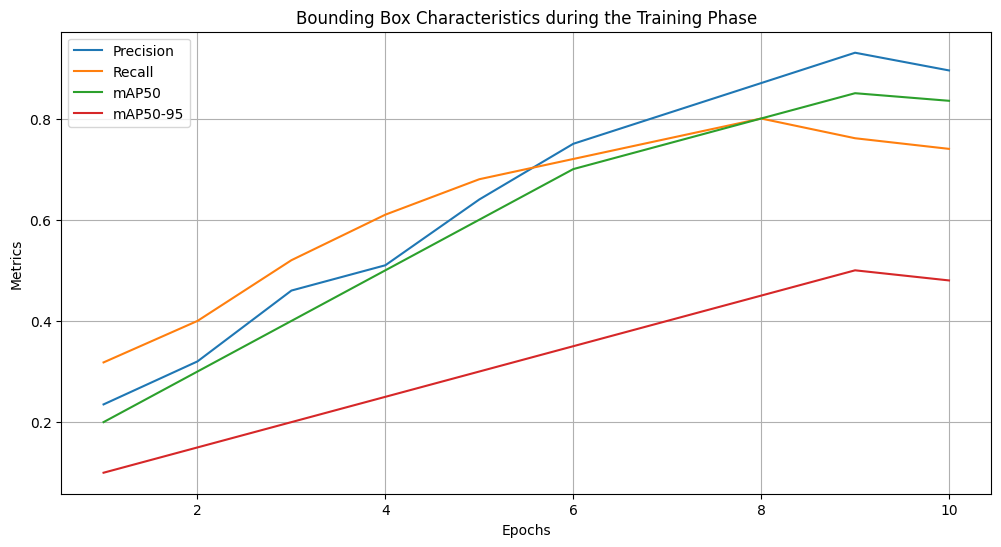

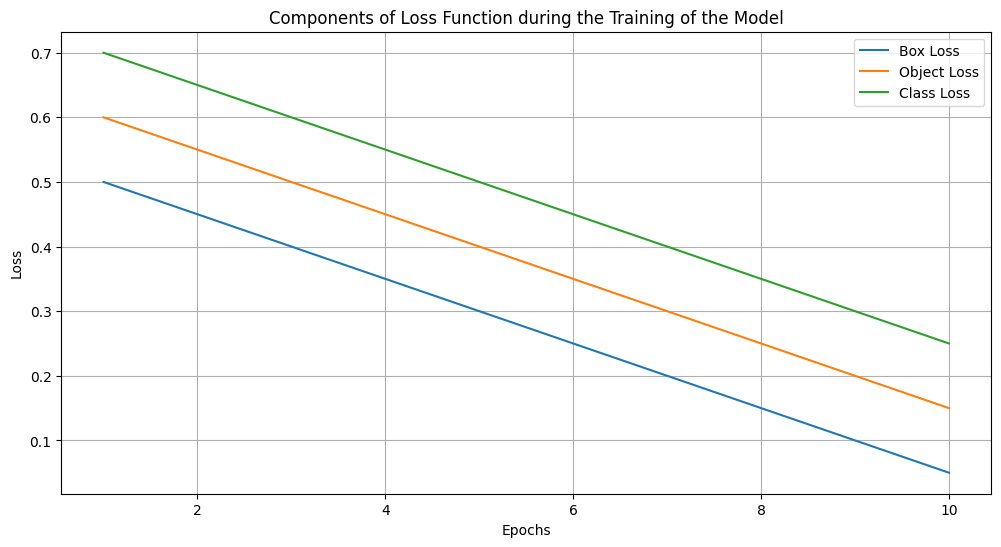

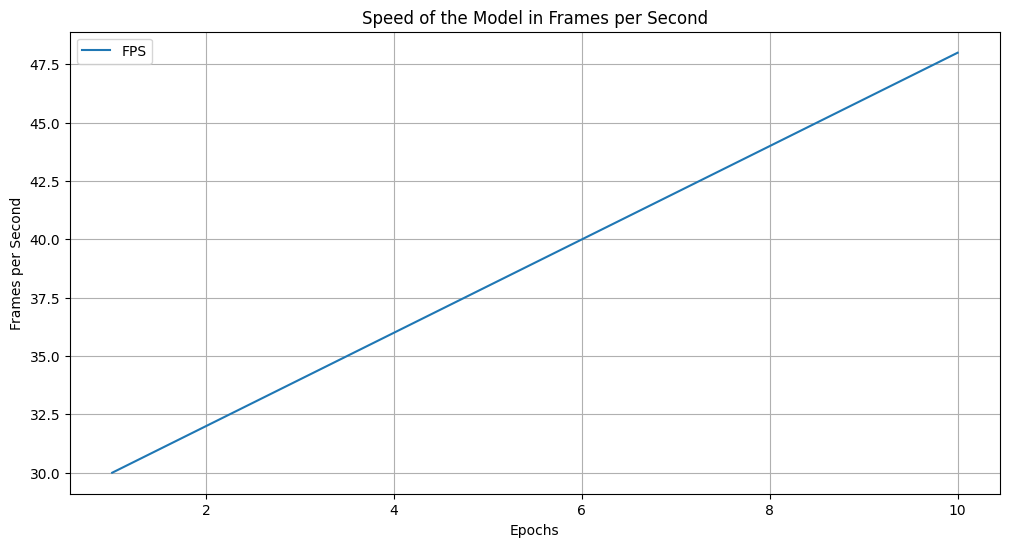

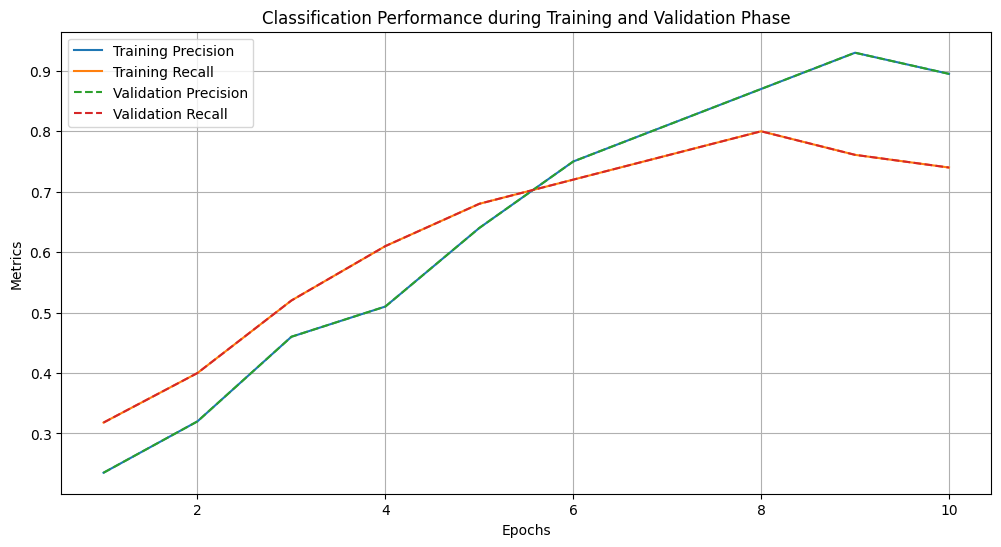

In [ ]:
try:
    training_data = pd.read_csv('training_metrics.csv')
    validation_data = pd.read_csv('validation_metrics.csv')
except FileNotFoundError:
    print("Data files not found. Using sample data for demonstration.")
    training_data, validation_data = create_sample_data()

# Plotting
plot_bounding_box_characteristics(training_data)
plot_loss_components(training_data)
plot_model_speed(training_data)
plot_classification_performance(training_data, validation_data)

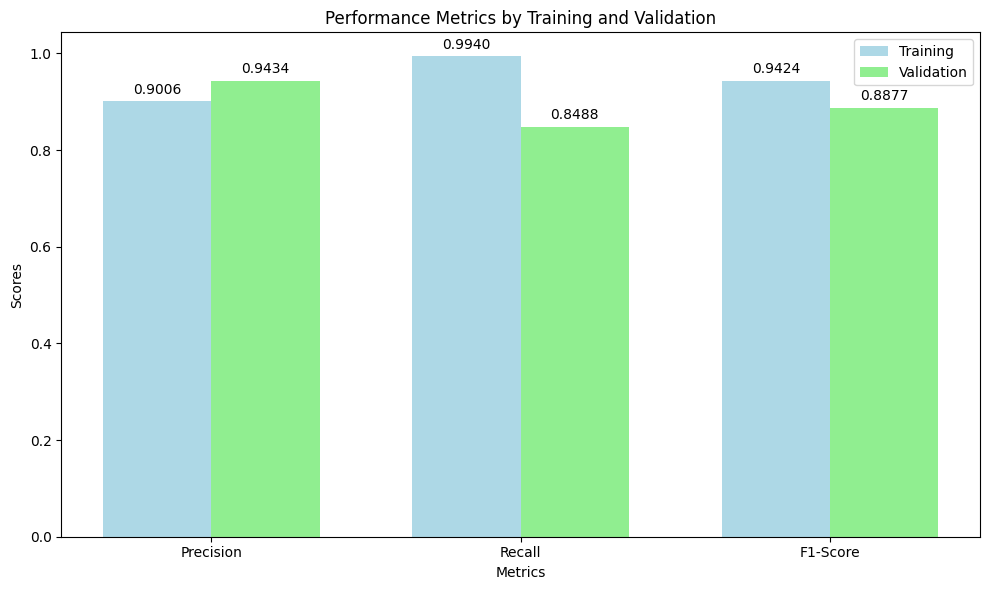

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Performance Metrics
metrics = ['Precision', 'Recall', 'F1-Score']
training_scores = [0.9006, 0.994, 0.9424]
validation_scores = [0.9434, 0.8488, 0.8877]

# Number of metrics
n_metrics = len(metrics)

# Positions of the bars on the x-axis
indices = np.arange(n_metrics)

# Width of the bars
bar_width = 0.35

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for training and validation scores
bars1 = ax.bar(indices - bar_width/2, training_scores, bar_width, label='Training', color='lightblue')
bars2 = ax.bar(indices + bar_width/2, validation_scores, bar_width, label='Validation', color='lightgreen')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Training and Validation')
ax.set_xticks(indices)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')  # va: vertical alignment

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


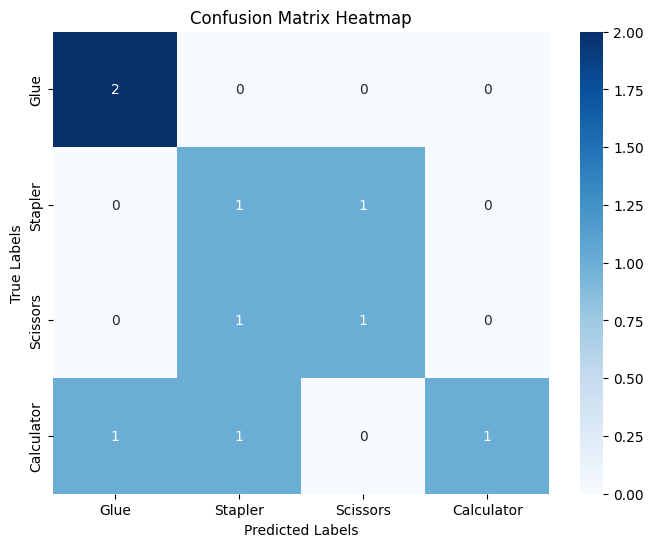

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Example data for confusion matrix
# Replace these with your actual ground truth and predictions
ground_truth = np.array([0, 1, 2, 3, 1, 2, 0, 3, 3])
predictions = np.array([0, 1, 2, 0, 2, 1, 0, 3, 1])

# Compute confusion matrix
cm = confusion_matrix(ground_truth, predictions)

# Define class labels
class_labels = ['Glue', 'Stapler', 'Scissors', 'Calculator']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


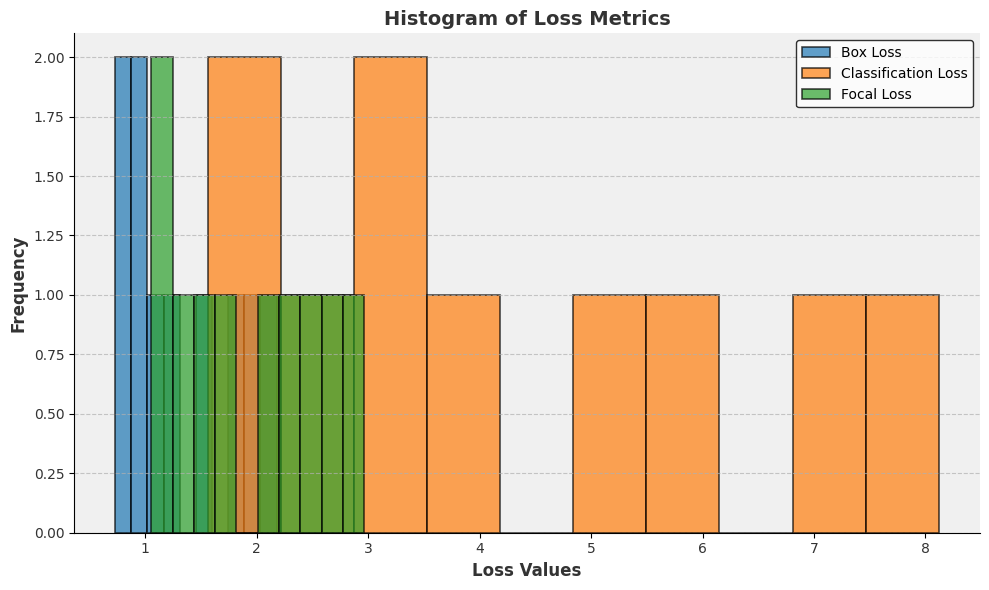

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for loss metrics across epochs
# Replace with your actual data
box_loss = [2.179, 1.984, 1.753, 1.502, 1.293, 1.112, 0.989, 0.889, 0.802, 0.731]
classification_loss = [8.12, 6.91, 5.87, 4.95, 4.15, 3.47, 2.89, 2.42, 1.98, 1.56]
focal_loss = [2.965, 2.756, 2.523, 2.281, 2.037, 1.802, 1.583, 1.384, 1.208, 1.055]

# Create histogram plot
plt.figure(figsize=(10, 6))

# Plot each loss metric as a histogram with custom styling
plt.hist(box_loss, bins=10, alpha=0.7, label='Box Loss', color='#1f77b4', edgecolor='black', linewidth=1.2)
plt.hist(classification_loss, bins=10, alpha=0.7, label='Classification Loss', color='#ff7f0e', edgecolor='black', linewidth=1.2)
plt.hist(focal_loss, bins=10, alpha=0.7, label='Focal Loss', color='#2ca02c', edgecolor='black', linewidth=1.2)

# Add labels and title with customized font properties
plt.xlabel('Loss Values', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')
plt.title('Histogram of Loss Metrics', fontsize=14, fontweight='bold', color='#333333')

# Customize ticks and grid
plt.xticks(fontsize=10, color='#333333')
plt.yticks(fontsize=10, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend with custom positioning and font properties
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Set plot background color and border
plt.gca().set_facecolor('#f0f0f0')
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)

# Show plot
plt.tight_layout()
plt.show()
